1. Загрузить датасет в Python.
2. Описать набор данных и решаемую задачу.
3. Выделить целевую переменную и факторные переменные.
4. Удалить ненужные данные, проанализировать отсутствующие значения.
5. Прокомментировать количественные параметры датасета.
6. Разбить выборку на обучающую и тестовую.
7. Построение модели и оптимизация гиперпараметров.


Данный вариант предполагает фокусировку на процессе улучшения эффективности модели обучения с учителем. Студенту следует подготовить датасет к обучению, обучить одну из моделей с учителем со значениями гиперпараметров по умолчанию, получить значение эффективности. После этого вручную или автоматически подобрать значения гиперпараметров таким образом, чтобы получить максимальный прирост эффективности.


In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

1. Загрузить датасет в Python.

In [210]:
df = pd.read_csv("glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


2. Описать набор данных и решаемую задачу.

Это набор данных идентификации стекла. Он содержит 10 атрибутов, включая идентификатор. Ответ типа стекла (7 дискретных значений)
Можно использовать этот датасет в задачах классификации для определения типа стекла.



In [211]:
print('Количество строк: ', df.shape[0], '\nКоличество столбцов: ', data.shape[1])

Количество строк:  214 
Количество столбцов:  10


In [212]:
print('\nТипы переменных:\n', df.dtypes)


Типы переменных:
 RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object


In [213]:
print('\nКоличество отсутствующих значений для каждого поля:\n', df.isna().sum())


Количество отсутствующих значений для каждого поля:
 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [214]:
print('\nКоличество уникальных полей для каждого столбца:\n', df.nunique())


Количество уникальных полей для каждого столбца:
 RI      178
Na      142
Mg       94
Al      118
Si      133
K        65
Ca      143
Ba       34
Fe       32
Type      6
dtype: int64


In [215]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Характеристики не в одной шкале. Например, Si имеет среднее значение 72,65, тогда как Fe имеет среднее значение 0,057. 

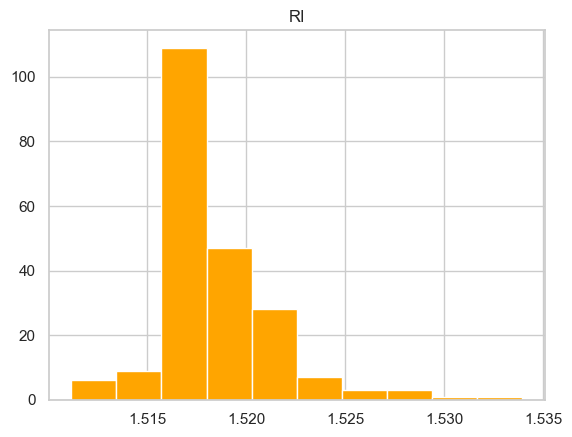


Для признака RI данные находятся в диапазоне от 1.51115 до 1.53393



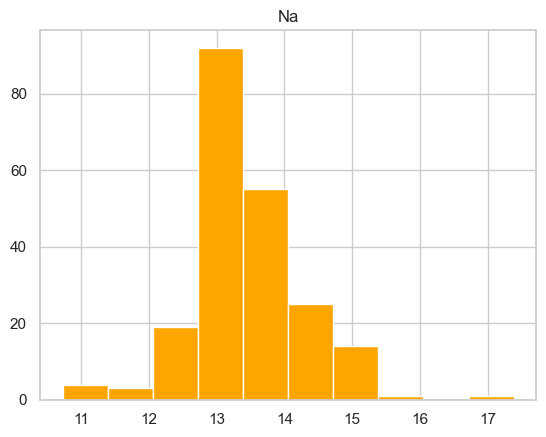


Для признака Na данные находятся в диапазоне от 10.73 до 17.38



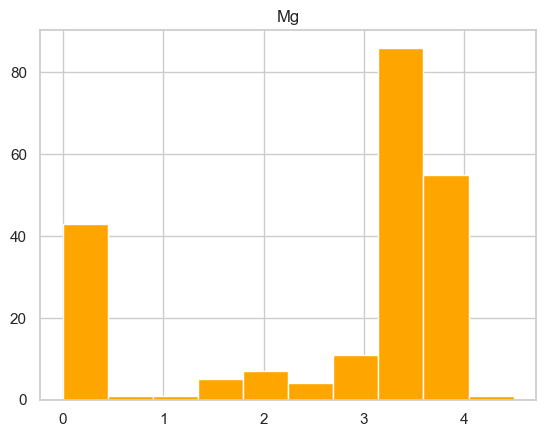


Для признака Mg данные находятся в диапазоне от 0.0 до 4.49



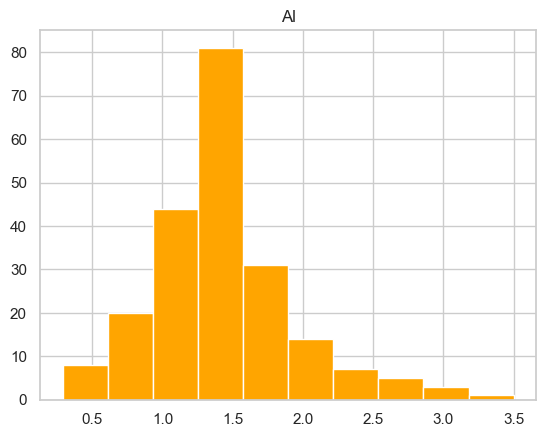


Для признака Al данные находятся в диапазоне от 0.29 до 3.5



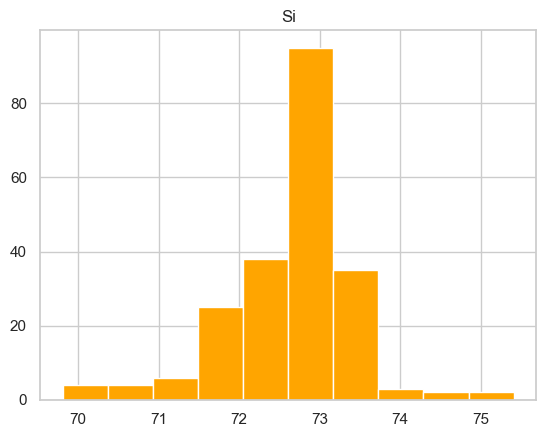


Для признака Si данные находятся в диапазоне от 69.81 до 75.41



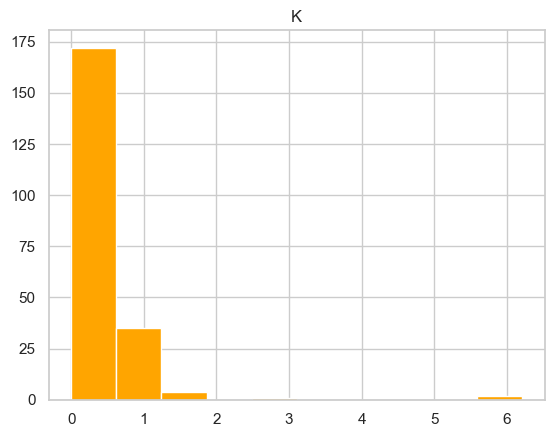


Для признака K данные находятся в диапазоне от 0.0 до 6.21



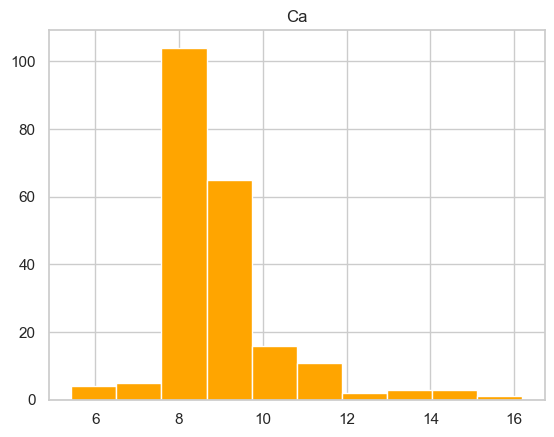


Для признака Ca данные находятся в диапазоне от 5.43 до 16.19



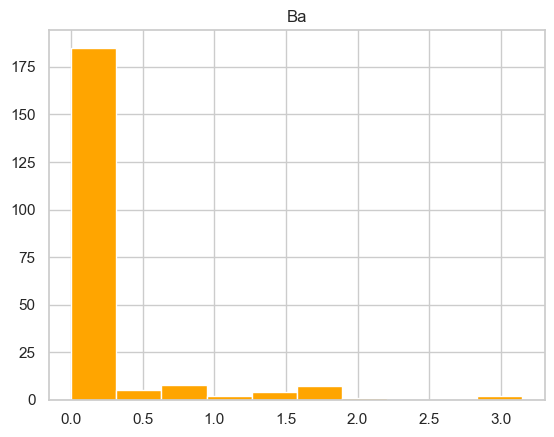


Для признака Ba данные находятся в диапазоне от 0.0 до 3.15



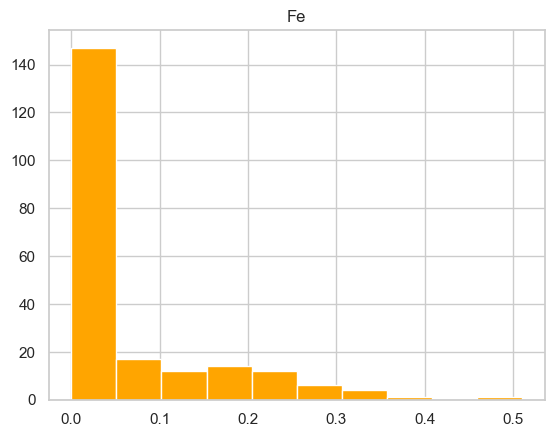


Для признака Fe данные находятся в диапазоне от 0.0 до 0.51



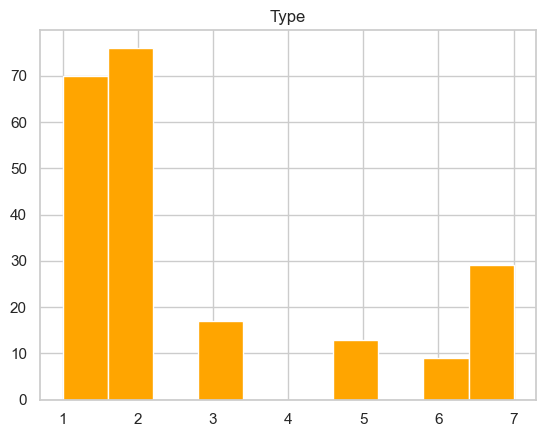


Для признака Type данные находятся в диапазоне от 1 до 7



In [216]:
num = df.select_dtypes(include='number').columns.tolist()
for column in num:
    plt.hist(df[column], color = 'orange')
    plt.title(column)
    plt.show()
    print(f'\nДля признака {column} данные находятся в диапазоне от {df[column].min()} до {df[column].max()}\n')

3. Выделить целевую переменную и факторные переменные.

Целева переменная - Type, остальные - факторные

In [217]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

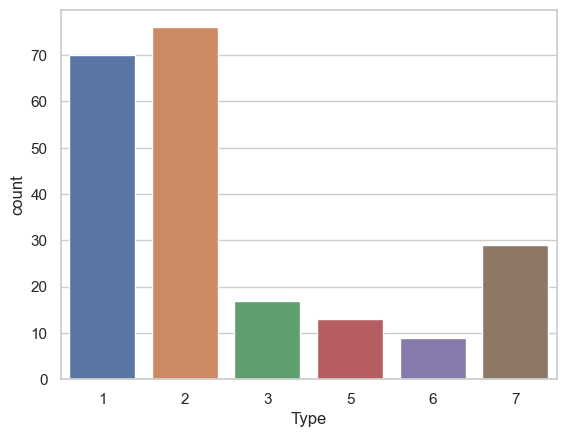

In [218]:
sns.countplot(x=df['Type'], data=df);

Набор данных довольно несбалансирован. Экземпляры типов 1 и 2 составляют более 67 % типов стекла.

4. Удалить ненужные данные, проанализировать отсутствующие значения.

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


Нет отсутствующих значений

Разберемся с выбросами

In [220]:
def outliers_iqr(x):
    quartile_1, quartile_3 = np.percentile(x, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((x > upper_bound) | (x < lower_bound))[0], x[(x <= upper_bound) | (x >= lower_bound)].min(), x[(x <= upper_bound) | (x >= lower_bound)].max()

In [221]:
df['RI'].value_counts()

1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 178, dtype: int64

<AxesSubplot:>

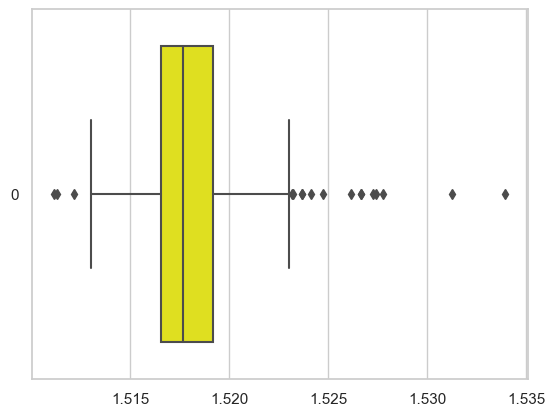

In [222]:
sns.boxplot(data=df.RI, color='yellow', orient='h')

In [223]:
RI_outliers, min_border, max_border = outliers_iqr(df['RI'])

In [224]:
len(RI_outliers)

17

In [225]:
min_border, max_border

(1.51115, 1.53393)

In [226]:
df.loc[RI_outliers, 'RI'] = np.nan

In [227]:
df['Na'].value_counts()

13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na, Length: 142, dtype: int64

<AxesSubplot:>

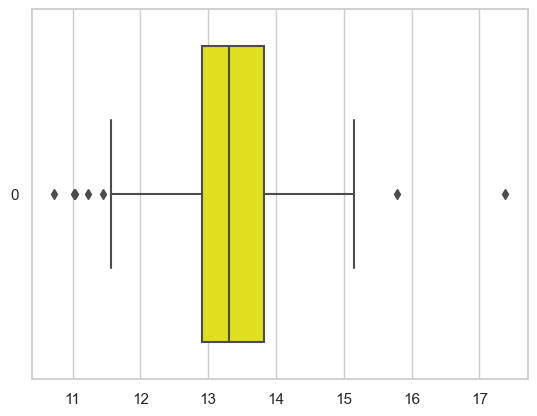

In [228]:
sns.boxplot(data=df.Na, color='yellow', orient='h')

In [229]:
Na_outliers, min_border, max_border = outliers_iqr(df['Na'])

In [230]:
len(Na_outliers)

7

In [231]:
df.loc[Na_outliers, 'Na'] = np.nan

<AxesSubplot:>

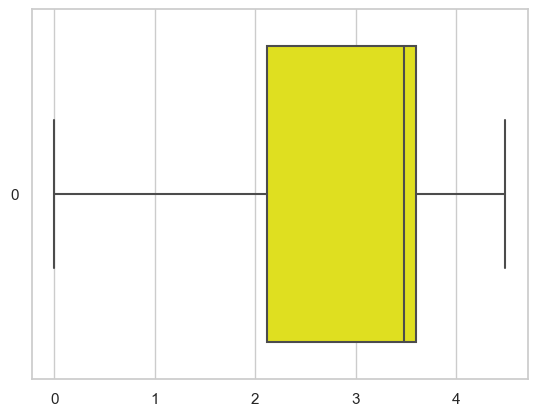

In [232]:
sns.boxplot(data=df.Mg, color='yellow', orient='h')

<AxesSubplot:>

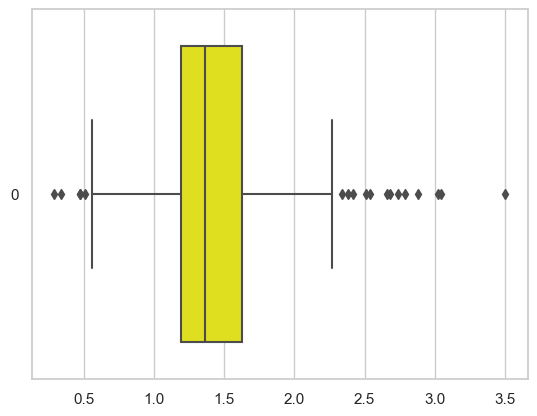

In [233]:
sns.boxplot(data=df.Al, color='yellow', orient='h')

In [234]:
AL_outliers, min_border, max_border = outliers_iqr(df['Al'])

In [235]:
len(AL_outliers)

18

In [236]:
df.loc[AL_outliers, 'Al'] = np.nan

<AxesSubplot:>

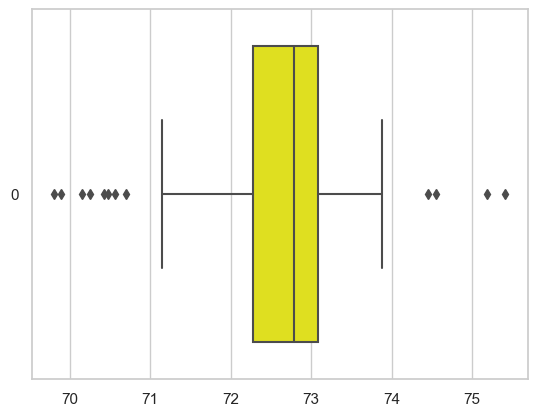

In [237]:
sns.boxplot(data=df.Si, color='yellow', orient='h')

In [238]:
Si_outliers, min_border, max_border = outliers_iqr(df['Si'])

In [239]:
len(Si_outliers)

12

In [240]:
df.loc[Si_outliers, 'Si'] = np.nan

<AxesSubplot:>

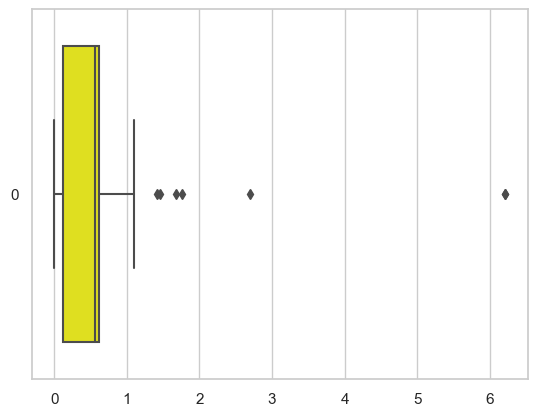

In [241]:
sns.boxplot(data=df.K, color='yellow', orient='h')

In [242]:
K_outliers, min_border, max_border = outliers_iqr(df['K'])

In [243]:
len(K_outliers)

7

In [244]:
df.loc[K_outliers, 'K'] = np.nan

<AxesSubplot:>

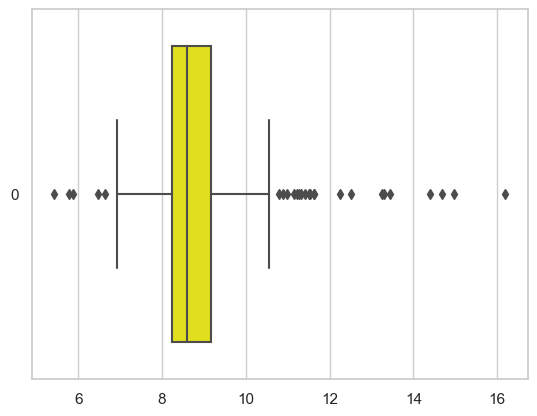

In [245]:
sns.boxplot(data=df.Ca, color='yellow', orient='h')

In [246]:
Ca_outliers, min_border, max_border = outliers_iqr(df['Ca'])

In [247]:
len(Ca_outliers)

26

In [248]:
df.loc[Ca_outliers, 'Ca'] = np.nan

<AxesSubplot:>

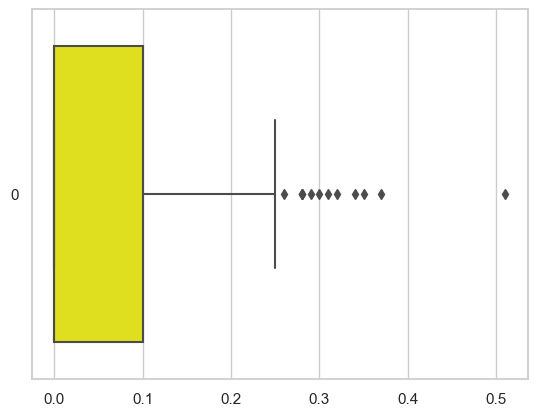

In [249]:
sns.boxplot(data=df.Fe, color='yellow', orient='h')

In [250]:
Fe_outliers, min_border, max_border = outliers_iqr(df['Fe'])

In [251]:
len(Fe_outliers)

12

In [252]:
df.loc[Fe_outliers, 'Fe'] = np.nan

<AxesSubplot:>

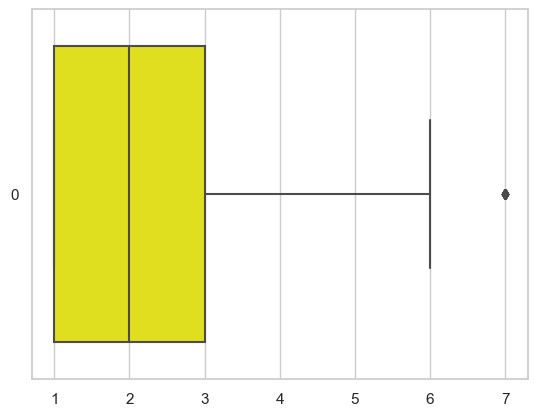

In [253]:
sns.boxplot(data=df.Type, color='yellow', orient='h')

In [254]:
Type_outliers, min_border, max_border = outliers_iqr(df['Type'])

In [255]:
len(Type_outliers)

29

In [256]:
df.loc[Type_outliers, 'Type'] = np.nan

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      197 non-null    float64
 1   Na      207 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      196 non-null    float64
 4   Si      202 non-null    float64
 5   K       207 non-null    float64
 6   Ca      188 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      202 non-null    float64
 9   Type    185 non-null    float64
dtypes: float64(10)
memory usage: 16.8 KB


In [258]:
df = df.dropna()

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 181
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      145 non-null    float64
 1   Na      145 non-null    float64
 2   Mg      145 non-null    float64
 3   Al      145 non-null    float64
 4   Si      145 non-null    float64
 5   K       145 non-null    float64
 6   Ca      145 non-null    float64
 7   Ba      145 non-null    float64
 8   Fe      145 non-null    float64
 9   Type    145 non-null    float64
dtypes: float64(10)
memory usage: 12.5 KB


5. Прокомментировать количественные параметры датасета.

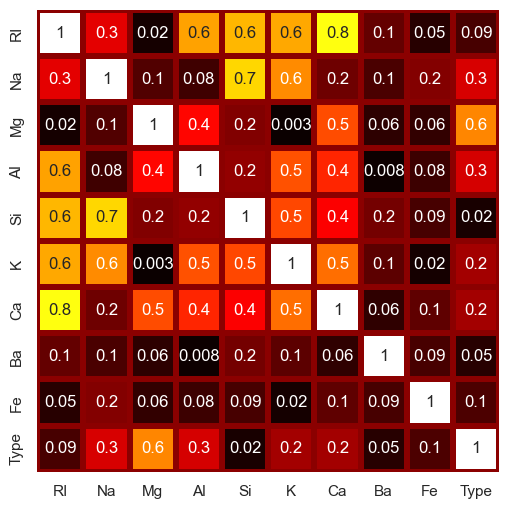

In [260]:
df_corr = df.corr().abs()
f=plt.figure(figsize=(6,6))
corr_matrix = sns.heatmap(
            df_corr, 
            annot = True, 
            fmt = '.1g', 
            cmap = 'hot', 
            linewidths = 4, 
            linecolor = 'darkred',
            cbar = False, 
            square = True, 
            xticklabels = df_corr.columns, 
            yticklabels = df_corr.columns);

Большая корреляция между Ca и Ri, Mg и Si

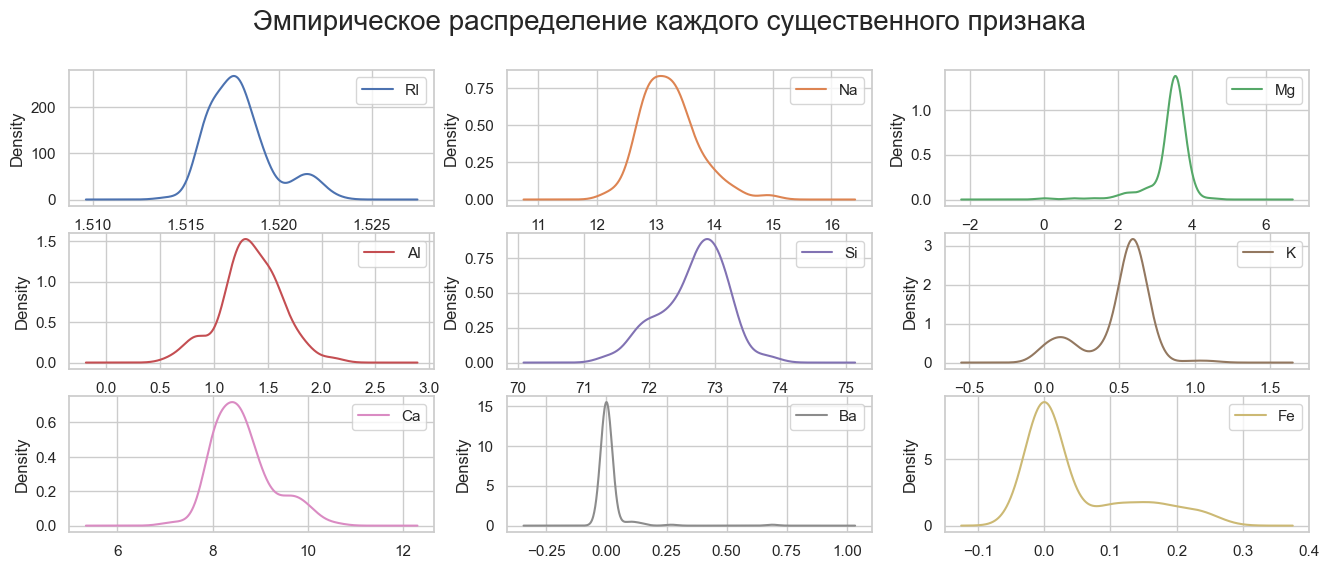

In [261]:
df[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']].plot(kind='kde', subplots=True, layout=(3, 3), sharex=False, figsize=(16, 6))
plt.suptitle('Эмпирическое распределение каждого существенного признака',fontsize=20);

6. Разбить выборку на обучающую и тестовую.

In [280]:
X = df[features] 
y = df['Type'] 
seed = 7
test_size = 0.4

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size , random_state = seed)

In [281]:
X_train.shape, y_train.shape

((87, 9), (87,))

In [282]:
X_test.shape, y_test.shape

((58, 9), (58,))

7. Построение модели и оптимизация гиперпараметров.


Данный вариант предполагает фокусировку на процессе улучшения эффективности модели обучения с учителем. Студенту следует подготовить датасет к обучению, обучить одну из моделей с учителем со значениями гиперпараметров по умолчанию, получить значение эффективности. После этого вручную или автоматически подобрать значения гиперпараметров таким образом, чтобы получить максимальный прирост эффективности.


In [283]:
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Decision_Tree",  "Random_Forest", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    GaussianNB()]

In [284]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)

C:\Users\lana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [285]:
sc = pd.DataFrame()
sc['name'] = names
sc['score'] = scores
sc.sort_values(by=["score"], ascending=False, inplace=True)
sc

,name,score
5,Random_Forest,0.741379
3,RBF_SVM,0.655172
0,Nearest_Neighbors,0.637931
4,Decision_Tree,0.620690
6,SGD,0.431034
1,Linear_SVM,0.396552
2,Polynomial_SVM,0.396552


In [286]:
sc

,name,score
5,Random_Forest,0.741379
3,RBF_SVM,0.655172
0,Nearest_Neighbors,0.637931
4,Decision_Tree,0.620690
6,SGD,0.431034
1,Linear_SVM,0.396552
2,Polynomial_SVM,0.396552


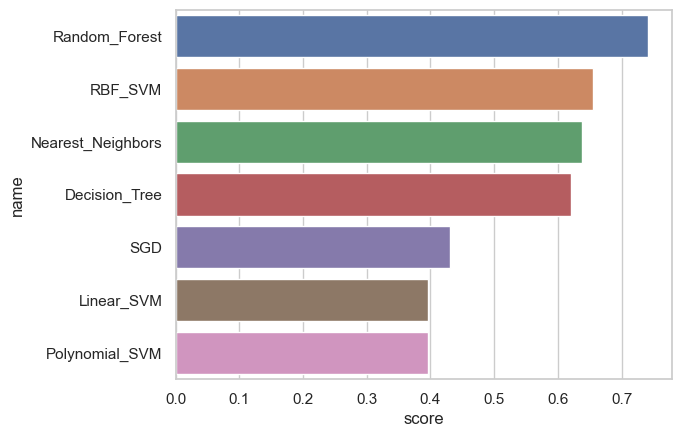

In [287]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=sc)

In [288]:
from sklearn.model_selection import GridSearchCV

In [289]:
rfc = RandomForestClassifier()
param_grid =  [ {
    'n_estimators': [100, 200,300,400], # number of estimators
    'criterion': ['gini', 'entropy'],   # Splitting criterion
    'max_features':[0.05 , 0.1], # maximum features used at each split
    'max_depth': [None, 5], # Max depth of the trees
    'min_samples_split': [0.005, 0.01], # mininal samples in leafs
    }]
grid_model = GridSearchCV(estimator=rfc,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=2)

In [293]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END criterion=gini, max_depth=None, max_features=0.05, min_samples_split=0.005, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=0.05, min_samples_split=0.005, n_estimators=100; total time=   0.0s


C:\Users\lana\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


[CV] END criterion=gini, max_depth=None, max_features=0.05, min_samples_split=0.005, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=0.05, min_samples_split=0.005, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=0.05, min_samples_split=0.005, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=0.05, min_samples_split=0.005, n_estimators=200; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=0.05, min_samples_split=0.005, n_estimators=200; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=0.05, min_samples_split=0.005, n_estimators=200; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=0.05, min_samples_split=0.005, n_estimators=200; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=0.05, min_samples_split=0.005, n_estimators=200; total time=   0.1s
[CV] END criterion=gini,

[CV] END criterion=gini, max_depth=None, max_features=0.1, min_samples_split=0.01, n_estimators=300; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_features=0.1, min_samples_split=0.01, n_estimators=300; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_features=0.1, min_samples_split=0.01, n_estimators=300; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_features=0.1, min_samples_split=0.01, n_estimators=300; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_features=0.1, min_samples_split=0.01, n_estimators=300; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_features=0.1, min_samples_split=0.01, n_estimators=400; total time=   0.3s
[CV] END criterion=gini, max_depth=None, max_features=0.1, min_samples_split=0.01, n_estimators=400; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_features=0.1, min_samples_split=0.01, n_estimators=400; total time=   0.3s
[CV] END criterion=gini, max_depth=None,

[CV] END criterion=gini, max_depth=5, max_features=0.1, min_samples_split=0.01, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=0.1, min_samples_split=0.01, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=0.1, min_samples_split=0.01, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=0.1, min_samples_split=0.01, n_estimators=200; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=0.1, min_samples_split=0.01, n_estimators=200; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=0.1, min_samples_split=0.01, n_estimators=200; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=0.1, min_samples_split=0.01, n_estimators=200; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=0.1, min_samples_split=0.01, n_estimators=200; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=0.1, min_samp

[CV] END criterion=entropy, max_depth=None, max_features=0.1, min_samples_split=0.005, n_estimators=200; total time=   0.1s
[CV] END criterion=entropy, max_depth=None, max_features=0.1, min_samples_split=0.005, n_estimators=300; total time=   0.2s
[CV] END criterion=entropy, max_depth=None, max_features=0.1, min_samples_split=0.005, n_estimators=300; total time=   0.2s
[CV] END criterion=entropy, max_depth=None, max_features=0.1, min_samples_split=0.005, n_estimators=300; total time=   0.2s
[CV] END criterion=entropy, max_depth=None, max_features=0.1, min_samples_split=0.005, n_estimators=300; total time=   0.2s
[CV] END criterion=entropy, max_depth=None, max_features=0.1, min_samples_split=0.005, n_estimators=300; total time=   0.2s
[CV] END criterion=entropy, max_depth=None, max_features=0.1, min_samples_split=0.005, n_estimators=400; total time=   0.3s
[CV] END criterion=entropy, max_depth=None, max_features=0.1, min_samples_split=0.005, n_estimators=400; total time=   0.2s
[CV] END

[CV] END criterion=entropy, max_depth=5, max_features=0.05, min_samples_split=0.01, n_estimators=400; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=0.05, min_samples_split=0.01, n_estimators=400; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=0.05, min_samples_split=0.01, n_estimators=400; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=0.05, min_samples_split=0.01, n_estimators=400; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=0.1, min_samples_split=0.005, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=0.1, min_samples_split=0.005, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=0.1, min_samples_split=0.005, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=0.1, min_samples_split=0.005, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [None, 5], 'max_features': [0.05, 0.1],
                          'min_samples_split': [0.005, 0.01],
                          'n_estimators': [100, 200, 300, 400]}],
             scoring='neg_mean_squared_error', verbose=2)

In [294]:
grid_model.best_estimator_

RandomForestClassifier(max_depth=5, max_features=0.05, min_samples_split=0.005,
                       n_estimators=400)

In [295]:
y_pred = grid_model.predict(X_test)

In [296]:
mean_squared_error(y_test,y_pred)

0.6379310344827587